In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the MNIST dataset from TensorFlow's keras datasets module
(x_train_loaded, y_train_loaded), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Create validation data (20%) from the training data (80%)
x_train, x_val, y_train, y_val = train_test_split(x_train_loaded, y_train_loaded, test_size=0.2)

# Print the size of datasets
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val  : ", x_val.shape)
print("y_val  : ", y_val.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train:  (48000, 28, 28)
y_train:  (48000,)
x_val  :  (12000, 28, 28)
y_val  :  (12000,)
x_test :  (10000, 28, 28)
y_test :  (10000,)


1. What are the shapes (sizes) of `x_train`, `x_val`, and `x_test`?
The shapes (sizes) of x_train, x_val, and x_test are:
x_train: (48000, 28, 28)
x_val: (12000, 28, 28)
x_test: (10000, 28, 28)
2. What do the shapes (sizes) of `x_train`, `x_val`, and `x_test` represent?
The first number is the number of samples,the last two numbers (28, 28) are the pixel dimensions of each image.
3. What are `y_train`, `x_val`, and `y_test` for?
y_train:labels for the training set;x_val:Input data for the validation set;y_test: Labels for the test set.
4. How would you modify the code if you wanted to use a different dataset provided by `keras.datasets`, such as `fashion_mnist`?
'(x_train_loaded, y_train_loaded), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data().'
5. If the MNIST images are grayscale, what would you expect the range of pixel values to be?
The expected range of pixel values for grayscale MNIST images is typically 0-255.
6. Explain the significance of the 80-20 split when creating a validation set. Are there scenarios where you might choose a different split?
The ratio can be adjusted based on dataset size and problem complexity.
7. What kind of data does the MNIST dataset contain, and why is it commonly used in machine learning and deep learning courses?
# I asked AI about this:
Contains grayscale images of handwritten digits (0-9), widely used because: 
1.Manageable scale, easy to process.
2.Simple and well-defined problem.
3.Widely used, facilitates comparison between different algorithms.
4.Suitable for learning introductory machine learning concepts.

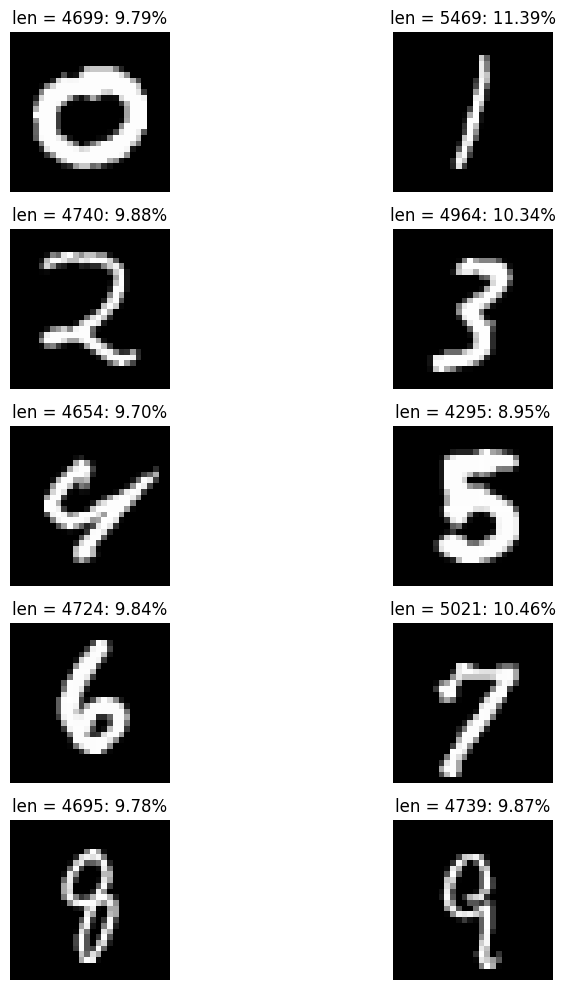

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create 10" by 10" figures
plt.figure(figsize=(10,10))

# Using NumPy for efficient indexing
x_train_np = np.array(x_train)
y_train_np = np.array(y_train)

for i in range(10):
    # Get the indices of the labels that match 'i'
    indices = np.where(y_train_np == i)[0]

    # Pick the first image from those indices
    img = x_train_np[indices[0]]

    # Split the screen into 5 rows and 2 columns
    plt.subplot(5, 2, i + 1)

    # Use the count of indices as the title
    plt.title(f"len = {len(indices)}: {100*len(indices)/len(y_train_np):.2f}%")

    # Turn off axis
    plt.axis("off")

    # Display the image
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

1. How do we plot the last image instead of the first image?
   Replace the "0" in 'img = x_train_np[indices[0]]' with "-1".
2. Which handwriting digit image do we have the most in the dataset?
   number "1".
3. Which handwriting digit image do we have the least in the dataset?
   number "5"
4. How can we modify the code to display three images for each digit side by side?
（See the codes down below)
5. How would you adjust the code to display the images in a 10x1 grid (10 rows and 1 column) instead of a 5x2 grid?
   Change ‘plt.subplot(5, 2, i + 1)’, to 'plt.subplot(10, 1, i + 1)'.
6. Why do we use cmap='gray' when displaying the images? What happens if you remove it?
   The MNIST dataset contains grayscale images of handwritten digits. Each pixel in these images is represented by a single value, typically ranging from 0 (black) to 255 (white), with values in between representing shades of gray.
When we use cmap='gray', we're telling matplotlib to use a colormap that maps these single values to shades of gray. This ensures that the images are displayed as true grayscale images, which is how they were originally captured and how they're meant to be viewed.
7. How can we modify the code to display the average image of each digit (i.e., the mean pixel value for each position)?
   Maybe add 'avg_img = np.mean(digit_images, axis=0)' before the displaying the image.
8. Why might it be essential to know which handwriting digit images are most or least common in the dataset?
   If some digits are significantly under- or over-represented in the dataset, it can lead to class imbalance. And might create bias towards predicting the more common digits in the models.

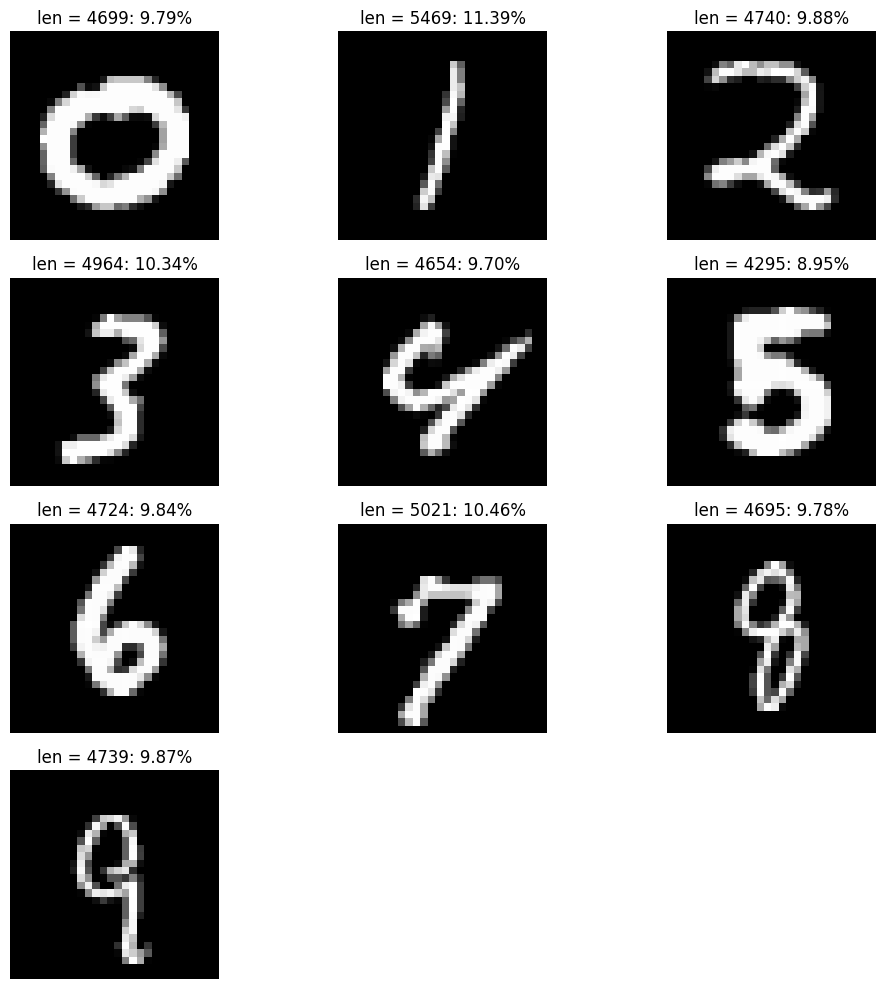

In [3]:

import matplotlib.pyplot as plt
import numpy as np

# Create 10" by 10" figures
plt.figure(figsize=(10,10))

# Using NumPy for efficient indexing
x_train_np = np.array(x_train)
y_train_np = np.array(y_train)

for i in range(10):
    # Get the indices of the labels that match 'i'
    indices = np.where(y_train_np == i)[0]

    # Pick the first image from those indices
    img = x_train_np[indices[0]]

    # Split the screen into 5 rows and 2 columns
    plt.subplot(4, 3, i + 1)

    # Use the count of indices as the title
    plt.title(f"len = {len(indices)}: {100*len(indices)/len(y_train_np):.2f}%")

    # Turn off axis
    plt.axis("off")

    # Display the image
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [4]:
def preprocess(data, label=False):
    # Ensure the data type conversion to 'float32'
    data = data.astype('float32')

    if label:
        # Convert the label into a one-hot vector
        return tf.keras.utils.to_categorical(data)
    else:
        # Normalize the data from 0 ~ 255 to 0 ~ 1
        data /= 255

        # Data augmentation can be integrated here if desired

        # Prepare input for Keras by reshaping the data
        # from (sample, width, height) to (sample, width, height, channel)
        return data.reshape((-1, 28, 28, 1))

In [5]:
# Preprocess data
x_train = preprocess(x_train)
x_val= preprocess(x_val)
x_test = preprocess(x_test)

# Preprocess labels
y_train = preprocess(y_train, label=True)
y_val = preprocess(y_val, label=True)
y_test = preprocess(y_test, label=True)

# Check data shape
print("Shape of preprocessed training data (x_train):", x_train.shape)
print("Shape of preprocessed validation data (x_val):", x_val.shape)
print("Shape of preprocessed testing data (x_test):", x_test.shape)

# Check normalization
print("Maximum pixel value in preprocessed training data:", x_train.max())
print("Maximum pixel value in preprocessed validation data:", x_val.max())
print("Maximum pixel value in preprocessed testing data:", x_test.max())

# Check one-hot vector
print("Shape of one-hot encoded training labels (y_train):", y_train.shape)
print("Shape of one-hot encoded validation labels (y_val):", y_val.shape)
print("Shape of one-hot encoded testing labels (y_test):", y_test.shape)

Shape of preprocessed training data (x_train): (48000, 28, 28, 1)
Shape of preprocessed validation data (x_val): (12000, 28, 28, 1)
Shape of preprocessed testing data (x_test): (10000, 28, 28, 1)
Maximum pixel value in preprocessed training data: 1.0
Maximum pixel value in preprocessed validation data: 1.0
Maximum pixel value in preprocessed testing data: 1.0
Shape of one-hot encoded training labels (y_train): (48000, 10)
Shape of one-hot encoded validation labels (y_val): (12000, 10)
Shape of one-hot encoded testing labels (y_test): (10000, 10)


1. What is the value of `x_train.max()`, and why are we printing it?
   It's 1, to check the normalization of the preprocessed training data, normalization is a crucial step in machine learning because it brings all data and features to a similar scale, ensuring no single feature dominates due to its larger magnitude.
2. What would the x_train.min() value be after preprocessing? Explain why.
 It would be 0, since the most common normalization technique for image data is to scale the pixel values from their original range [0, 255] to [0, 1]. 
3. How is the shape of `y_train`, `y_val`, and `y_test` different from before the preprocessing step?
The labels are now likely in a 2D array.Each row represents one sample, and each column represents a distinct class.The shape is now probably (n_samples, n_classes), where n_classes is the total number of unique classes.
4. How is the One-Hot vector representing the label for each data?
   Each one-hot vector represents a label by having a '1' in the position corresponding to the correct class and '0's everywhere else, uniquely identifying the class for each data point.
6. How is the normalization achieved for the image data?
Through the preprocess() function:orginal image/ 255.
8. Why do we need to reshape the image data for CNNs and not just use the flattened version like in MLPs?
   CNNs require reshaped image data to preserve spatial relationships between pixels, enabling them to detect and learn hierarchical features effectively, unlike MLPs which process flattened inputs.
10. Why is applying the same preprocessing steps to training and testing datasets important?
For maintaining consistency and ensuring that the model generalizes correctly.
12. Given that the MNIST dataset consists of ten digits (0-9), what is the expected size of the one-hot encoded vector for the labels? Why?
    The expected size is "10": 10 possible digits (0-9), with a '1' in the position of the correct digit and '0's elsewhere.

In [6]:
# Define a function to create our modern CNN model
def create_sequential_model():
    # Initialize a sequential model
    model = tf.keras.models.Sequential()

    # ----- First Convolutional Block -----
    # Add a 2D convolution layer with 32 filters, a 3x3 kernel, and padding to keep the spatial dimensions the same.
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv1', input_shape=(28, 28 , 1)))
    # Normalize the activations of the previous layer. This can improve the convergence speed and model's overall performance.
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))
    # Pool the spatial dimensions by taking the maximum value in a 2x2 region.
    model.add(tf.keras.layers.MaxPooling2D((2, 2), name='pool1'))
    # Randomly set a quarter of the input units to 0 to prevent overfitting.
    model.add(tf.keras.layers.Dropout(0.25))

    # ----- Second Convolutional Block -----
    # Add another convolution layer, this time with 64 filters.
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', name='conv2'))
    # Add batch normalization again
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))
    # Apply max pooling again to reduce spatial dimensions
    model.add(tf.keras.layers.MaxPooling2D((2, 2), name='pool2'))
    # Apply dropout again to prevent overfitting
    model.add(tf.keras.layers.Dropout(0.25))

    # ----- Third Convolutional Block -----
    # A third convolution layer, still with 64 filters.
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', name='conv3'))
    # Add batch normalization
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))

    # ----- Flattening and Dense layers -----
    # Flatten the tensor output from the last convolutional layer
    model.add(tf.keras.layers.Flatten(name='flatten'))
    # Add a dense (fully connected) layer with 64 units
    model.add(tf.keras.layers.Dense(64, name='dense4'))
    # Add batch normalization
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))
    # Apply dropout before the final classification layer to prevent overfitting
    model.add(tf.keras.layers.Dropout(0.5))
    # Add a dense layer for classification. Since MNIST has 10 classes, we use 10 units with softmax activation.
    model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense5'))

    # Return the constructed model
    return model

In [7]:
# Define a function to create our modern CNN model
def create_sequential_model():
    # Initialize a sequential model
    model = tf.keras.models.Sequential()

    # ----- First Convolutional Block -----
    # Add a 2D convolution layer with 32 filters, a 3x3 kernel, and padding to keep the spatial dimensions the same.
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv1', input_shape=(28, 28 , 1)))
    # Normalize the activations of the previous layer. This can improve the convergence speed and model's overall performance.
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))
    # Pool the spatial dimensions by taking the maximum value in a 2x2 region.
    model.add(tf.keras.layers.MaxPooling2D((2, 2), name='pool1'))
    # Randomly set a quarter of the input units to 0 to prevent overfitting.
    model.add(tf.keras.layers.Dropout(0.25))

    # ----- Second Convolutional Block -----
    # Add another convolution layer, this time with 64 filters.
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', name='conv2'))
    # Add batch normalization again
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))
    # Apply max pooling again to reduce spatial dimensions
    model.add(tf.keras.layers.MaxPooling2D((2, 2), name='pool2'))
    # Apply dropout again to prevent overfitting
    model.add(tf.keras.layers.Dropout(0.25))

    

    # ----- Flattening and Dense layers -----
    # Flatten the tensor output from the last convolutional layer
    model.add(tf.keras.layers.Flatten(name='flatten'))
    # Add a dense (fully connected) layer with 64 units
    model.add(tf.keras.layers.Dense(64, name='dense4'))
    # Add batch normalization
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))
    # Apply dropout before the final classification layer to prevent overfitting
    model.add(tf.keras.layers.Dropout(0.5))
    # Add a dense layer for classification. Since MNIST has 10 classes, we use 10 units with softmax activation.
    model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense5'))

    # Return the constructed model
    return model

In [8]:
# Define a function to create our modern CNN model
def create_sequential_model():
    # Initialize a sequential model
    model = tf.keras.models.Sequential()

    # ----- First Convolutional Block -----
    # Add a 2D convolution layer with 32 filters, a 3x3 kernel, and padding to keep the spatial dimensions the same.
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', name='conv1', input_shape=(28, 28 , 1)))
    # Normalize the activations of the previous layer. This can improve the convergence speed and model's overall performance.
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))
    # Pool the spatial dimensions by taking the maximum value in a 2x2 region.
    model.add(tf.keras.layers.MaxPooling2D((2, 2), name='pool1'))
    # Randomly set a quarter of the input units to 0 to prevent overfitting.
    model.add(tf.keras.layers.Dropout(0.25))

    # ----- Second Convolutional Block -----
    # Add another convolution layer, this time with 64 filters.
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', name='conv2'))
    # Add batch normalization again
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))
    # Apply max pooling again to reduce spatial dimensions
    model.add(tf.keras.layers.MaxPooling2D((2, 2), name='pool2'))
    # Apply dropout again to prevent overfitting
    model.add(tf.keras.layers.Dropout(0.25))

    # ----- Third Convolutional Block -----
    # A third convolution layer, still with 64 filters.
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', name='conv3'))
    # Add batch normalization
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))

    # ----- Flattening and Dense layers -----
    # Flatten the tensor output from the last convolutional layer
    model.add(tf.keras.layers.Flatten(name='flatten'))
    # Add a dense (fully connected) layer with 64 units
    model.add(tf.keras.layers.Dense(64, name='dense4'))
    # Add batch normalization
    model.add(tf.keras.layers.BatchNormalization())
    # Use the ReLU activation function
    model.add(tf.keras.layers.Activation('relu'))
    # Apply dropout before the final classification layer to prevent overfitting
    model.add(tf.keras.layers.Dropout(0.5))
    # Add a dense layer for classification. Since MNIST has 10 classes, we use 10 units with softmax activation.
    model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense5'))

    # Return the constructed model
    return model


In [9]:
# Create the CNN model
model = create_sequential_model()

# Display a tabular view of the model's layers, output shapes, and the number of parameters.
model.summary()

# Compile the model, specifying the loss function, optimizer, and metric to monitor
model.compile(
    # Categorical crossentropy is a common loss function used for categorical classification tasks.
    loss=tf.keras.losses.CategoricalCrossentropy(),

    # RMSprop optimizer adjusts the learning rate throughout training.
    optimizer=tf.keras.optimizers.RMSprop(),

    # Metric to monitor during training and testing.
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense5 (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,058 (1008.04 KB)

 Trainable params: 257,610 (1006.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
import os

log_dir = '.'
ckpt_name = 'weights-{epoch:02d}-{loss:.2f}-{categorical_accuracy:.2f}-{val_loss:.2f}-{val_categorical_accuracy:.2f}.hdf5'
cbs = [
        tf.keras.callbacks.TensorBoard(log_dir=log_dir),
        tf.keras.callbacks.ModelCheckpoint(os.path.join(log_dir, ckpt_name),
                        monitor='val_categorical_accuracy',
                        verbose=0,
                        save_best_only=False,
                        save_weights_only=True,
                        mode='auto',
                        save_freq='epoch')
]

ValueError: When using `save_weights_only=True` in `ModelCheckpoint`, the filepath provided must end in `.weights.h5` (Keras weights format). Received: filepath=./weights-{epoch:02d}-{loss:.2f}-{categorical_accuracy:.2f}-{val_loss:.2f}-{val_categorical_accuracy:.2f}.hdf5

In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

In [15]:
batch_size = 128
epochs = 3
verbose = 1

# Use the datagen.flow method to create a generator for the training data
train_data_gen = datagen.flow(x_train, y_train, batch_size=batch_size)

# Train the model using the fit method
history = model.fit(
    train_data_gen,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks = cbs,
    verbose=verbose)

NameError: name 'cbs' is not defined

In [16]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='Training categorical accuracy')
plt.plot(epochs, val_acc, 'r', label='Val categorical accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [17]:
import glob

def get_last_weight(log_dir):
    # Get a list of all hdf5 files in the directory
    weight_paths = glob.glob(os.path.join(log_dir, "*.hdf5"))

    # Return the path with the highest epoch number (assuming filename structure is consistent)
    return max(weight_paths, key=os.path.getctime) if weight_paths else None

In [18]:
# Create a new instance of the CNN model.
model = create_sequential_model()

# Retrieve the path of the most recent checkpoint (model weights) saved during training.
last_checkpoint_path = get_last_weight(log_dir)

# Check if there's a valid checkpoint path.
if last_checkpoint_path:

    # Load the weights from the checkpoint into the model.
    model.load_weights(last_checkpoint_path)

    # Compile the model with the specified loss function, optimizer, and metrics.
    model.compile(
        # Use Categorical Crossentropy as the loss function which is common for classification tasks.
        loss=tf.keras.losses.CategoricalCrossentropy(),

        # Use RMSprop optimizer which adjusts the learning rate during training.
        optimizer=tf.keras.optimizers.RMSprop(),

        # Monitor the Categorical Accuracy metric during training and evaluation.
        metrics=[tf.keras.metrics.CategoricalAccuracy()]
    )

    # Evaluate the model on the test dataset and store the results in 'score'.
    score = model.evaluate(x_test, y_test)

    # Print each metric name with its corresponding value.
    for metric, value in zip(model.metrics_names, score):
        print(f"{metric}: {value:.4f}")

else:
    # If no checkpoint is found, display an error message.
    print("No checkpoint found!")

No checkpoint found!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


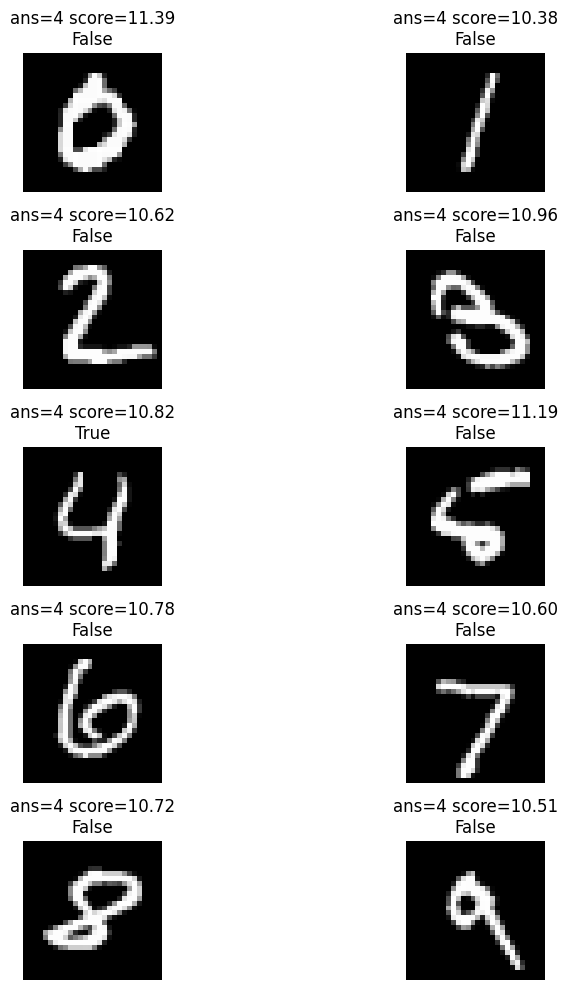

In [19]:
# Load the MNIST dataset and only keep the test data
_, (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# For each class (0 through 9), find the index of the first occurrence and store these indices
samples = [np.where(test_y == i)[0][0] for i in range(10)]

# Use the found indices to extract one sample per class from the test data
selected_x = test_x[samples]
selected_y = test_y[samples]

# Apply preprocessing to each selected image. The preprocess function might be
# performing tasks like normalization, reshaping etc. However, we avoid any
# label-related preprocessing.
preprocessed_x = np.array([preprocess(img, label=False) for img in selected_x])

# Remove any singleton dimensions from the preprocessed data
preprocessed_x = np.squeeze(preprocessed_x, axis=1)

# Use the trained model to predict the class of each preprocessed image
predictions = model.predict(preprocessed_x)

# Initialize a 10x10 inches figure to plot the images
plt.figure(figsize=(10,10))

# Loop through each selected image, its true label, and the predicted probabilities
for i, (x, y, pred) in enumerate(zip(selected_x, selected_y, predictions)):
    # Get the class with the highest predicted probability
    ans = np.argmax(pred)
    # Get the confidence score of the prediction
    score = np.max(pred) * 100

    # Plot the image in a grid, turning off the axis, and showing the predicted
    # class, confidence score, and whether the prediction was correct.
    plt.subplot(5,2, i+1)
    plt.axis("off")
    plt.title(f"ans={ans} score={score:.2f}\n{ans==y}")
    plt.imshow(x, cmap='gray')

# Adjust the layout to ensure the subplots do not overlap
plt.tight_layout()

# Display the plot
plt.show()

In [20]:
# Create a new instance of the CNN model.
model = create_sequential_model()

# Retrieve the path of the most recent checkpoint (model weights) saved during training.
last_checkpoint_path = get_last_weight(log_dir)

# Check if there's a valid checkpoint path.
if last_checkpoint_path:

    # Load the weights from the checkpoint into the model.
    model.load_weights(last_checkpoint_path)

    # Compile the model with the specified loss function, optimizer, and metrics.
    model.compile(
        # Use Categorical Crossentropy as the loss function which is common for classification tasks.
        loss=tf.keras.losses.CategoricalCrossentropy(),

        # Use RMSprop optimizer which adjusts the learning rate during training.
        optimizer=tf.keras.optimizers.RMSprop(),

        # Monitor the Categorical Accuracy metric during training and evaluation.
        metrics=[tf.keras.metrics.CategoricalAccuracy()]
    )

    # Evaluate the model on the test dataset and store the results in 'score'.
    score = model.evaluate(x_test, y_test)

    # Print each metric name with its corresponding value.
    for metric, value in zip(model.metrics_names, score):
        print(f"{metric}: {value:.4f}")

else:
    # If no checkpoint is found, display an error message.
    print("No checkpoint found!")

No checkpoint found!


In [21]:
# Function to display a grid of images
def show_imgs(images, row, column, cm=None):
    # Create a figure for plotting
    plt.figure(figsize=(12,12))

    # Iterate through specified number of rows and columns
    for i in range(row*column):
        plot_num = i + 1

        # Define subplot for each image
        plt.subplot(row, column , plot_num)
        # Turn off axis
        plt.axis("off")

        # Display the image, using specified colormap if provided
        if cm is None:
            plt.imshow(images[:,:,i])
        else:
            plt.imshow(images[:,:,i], cmap=cm)

        # Exit loop after displaying all required images
        if plot_num == (row * column):
            break

    # Adjust layout and display all images
    plt.tight_layout()
    plt.show()

# Function to display activation maps for a given layer of the model
def show_activation_map(model, x, layer_name, row=1, column=1):
    # Retrieve the desired layer by name from the model
    target_layer = model.get_layer(layer_name)

    # Create a new model with the same input but output as the activation from the target layer
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=target_layer.output)

    # Ensure input image tensor has a batch dimension
    input_tensor = preprocess(x, label=False)

    # Obtain the activation maps for the input tensor
    activation = activation_model.predict(input_tensor)

    # Print the shape of the activations (useful for understanding the number of channels, etc.)
    print("activation shape : ", activation.shape)

    # Use the display function to visualize the activation maps
    show_imgs(activation[0], row=row, column=column, cm='inferno')

In [22]:
target_layer_name = 'conv1'
input_img = x_test[0]

show_activation_map(model, input_img, target_layer_name, row=5, column=5)

ValueError: The layer sequential_2 has never been called and thus has no defined input.

### Need help for the codes above.